In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold

In [2]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test"

In [3]:
cols = ["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN","RAWRED-MEAN","RAWBLUE-MEAN","RAWGREEN-MEAN","EXRED-MEAN","EXBLUE-MEAN","EXGREEN-MEAN","VALUE-MEAN","SATURATION-MEAN","HUE-MEAN"]

In [4]:
data1 = pd.read_csv(url1, header=2, names=cols)
data2 = pd.read_csv(url2, header=2, names=cols)
data = pd.concat([data1, data2])

In [11]:
X1 = data.iloc[:, 4:9]
X2 = data.iloc[:, 10:20]
X3 = data.drop(["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
Y = data["CLASS"]

# Questão 2 - a

#### k-fold

In [19]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X1, Y)

10

In [21]:
for train_id, test_id in kf.split(X1, Y):
    X1_train, X1_test = X1.iloc[train_id], X1.iloc[test_id]
    Y1_train, Y1_test = Y.iloc[train_id], Y.iloc[test_id]

for train_id, test_id in kf.split(X2, Y):
    X2_train, X2_test = X2.iloc[train_id], X2.iloc[test_id]
    Y2_train, Y2_test = Y.iloc[train_id], Y.iloc[test_id]

for train_id, test_id in kf.split(X3, Y):
    X3_train, X3_test = X3.iloc[train_id], X3.iloc[test_id]
    Y3_train, Y3_test = Y.iloc[train_id], Y.iloc[test_id]

##### NB

In [22]:
nb = GaussianNB()
nb.fit(X1_train, Y1_train)
y_pred = nb.predict(X1_test)

In [23]:
accuracy_score(Y1_test,y_pred)

0.30735930735930733

In [26]:
nb = GaussianNB()
nb.fit(X2_train, Y2_train)
y_pred = nb.predict(X2_test)

In [27]:
accuracy_score(Y2_test,y_pred)

0.6147186147186147

In [28]:
nb = GaussianNB()
nb.fit(X3_train, Y3_train)
y_pred = nb.predict(X3_test)

In [29]:
accuracy_score(Y3_test,y_pred)

0.5454545454545454

##### k-NN

In [13]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, train_size=0.8)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, train_size=0.8)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, train_size=0.8)

Melhor valor de k:  1
Acurácia com melhor k:  0.43506493506493504


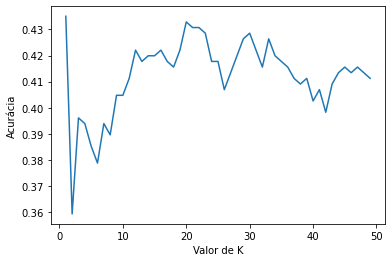

In [18]:
neighborhood = range(1,50)
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X1_train, Y1_train)
    y_pred = knn.predict(X1_test)
    scores[n] = accuracy_score(Y1_test,y_pred)
    scores_list.append(accuracy_score(Y1_test,y_pred))

plt.plot(neighborhood,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k + 1)
print("Acurácia com melhor k: ", max(scores_list))
    

Melhor valor de k:  1
Acurácia com melhor k:  0.9090909090909091


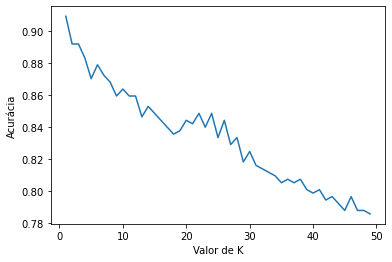

In [16]:
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X2_train, Y2_train)
    y_pred = knn.predict(X2_test)
    scores[n] = accuracy_score(Y2_test,y_pred)
    scores_list.append(accuracy_score(Y2_test,y_pred))

plt.plot(neighborhood,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k + 1)
print("Acurácia com melhor k: ", max(scores_list))

Melhor valor de k:  1
Acurácia com melhor k:  0.9025974025974026


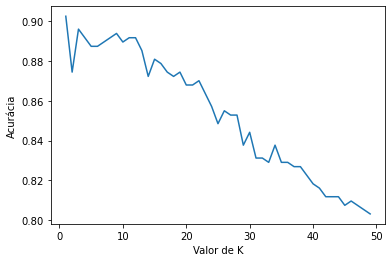

In [17]:
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X3_train, Y3_train)
    y_pred = knn.predict(X3_test)
    scores[n] = accuracy_score(Y3_test,y_pred)
    scores_list.append(accuracy_score(Y3_test,y_pred))

plt.plot(neighborhood,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k + 1)
print("Acurácia com melhor k: ", max(scores_list))

#### RL

In [32]:
rl = LinearRegression()
rl.fit(X1, Y)
rl_scores = cross_validate(rl, X1, Y, cv=5)

ValueError: could not convert string to float: 'BRICKFACE'